# 1- Perkenalan

>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai

- Nama : Didit Eko Setyo Ariandi
- batch : 015 
- dataset : WA_Fn-UseC_-Telco-Customer-Churn
- objective : predict customer churn

# 2- Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, MinMaxScaler
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import Model 

# 3-  Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll

In [ ]:
#load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#duplicate dataset
df1=df.copy()

In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- we have to change the format of the total charge data from object to float because the data is numeric

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


statement :
- type data type consists of 2 int, 17 string/object, 2 float
- it can be seen from the data info above, it turns out that there is a missing value in the TotalCharges column

In [ ]:
#dataset info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


# 4- Exploratory Data Analysis (EDA)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [ ]:
#Matikan warnings
warnings.filterwarnings('ignore')

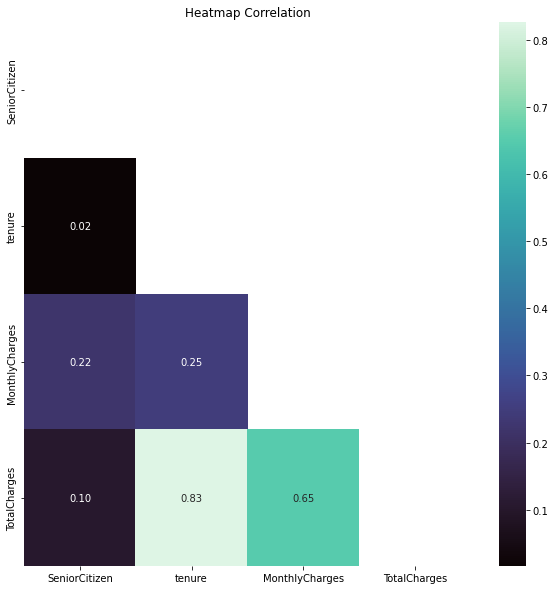

In [ ]:
# get correlation using Heatmap
plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), mask=mask ,annot=True, fmt=".2f", cmap ="mako")
plt.title("Heatmap Correlation")
plt.show()

In [ ]:
# group by churn
Churn = df.groupby(['Churn'])[['Churn']].count()
Churn

,Churn
Churn,
No,5174
Yes,1869


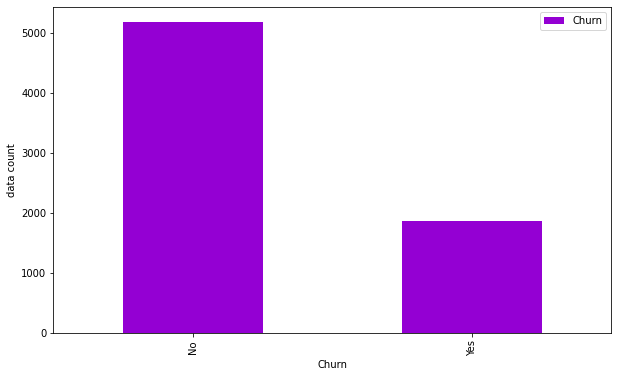

In [ ]:
#make histo
Churn.plot(kind='bar', figsize=(10,6), color='darkviolet')
plt.xlabel('Churn')
plt.ylabel('data count')

plt.show()

- terjadinya imbalance data pada target churn
- dimana no=customer msih berlangganan sedangkan yes = customer berhenti berlangganan

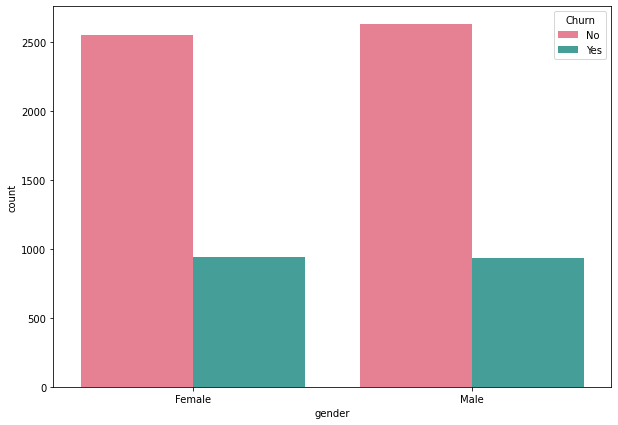

In [ ]:
#show hist gender
plt.figure(figsize=(10,7))
sns.countplot('gender', hue= 'Churn', data=df, palette='husl')
plt.show()

- Dapat dilihat bahwa gender tidak mempengaruhi customer akan churn atau tidak

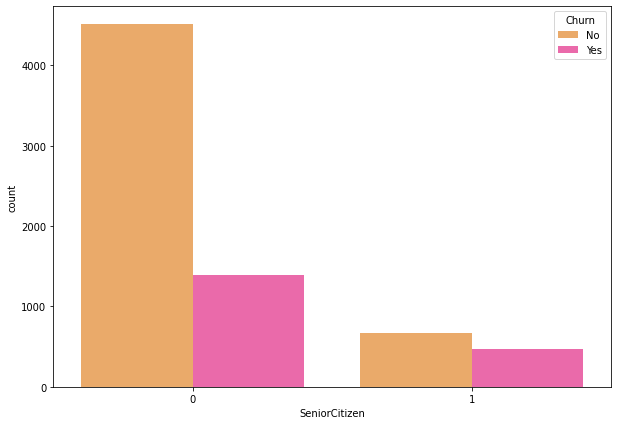

In [ ]:
#show hist SeniorCitizen
plt.figure(figsize=(10,7))
sns.countplot('SeniorCitizen', hue= 'Churn', data=df, palette='spring_r')
plt.show()

- Dapat dilihat bahwa senior citizen memilki korelasi terhadap target karna kebanyaka orang tua itu churn

- Dimana 0 itu anakmuda dan 1 itu user lanjut usia

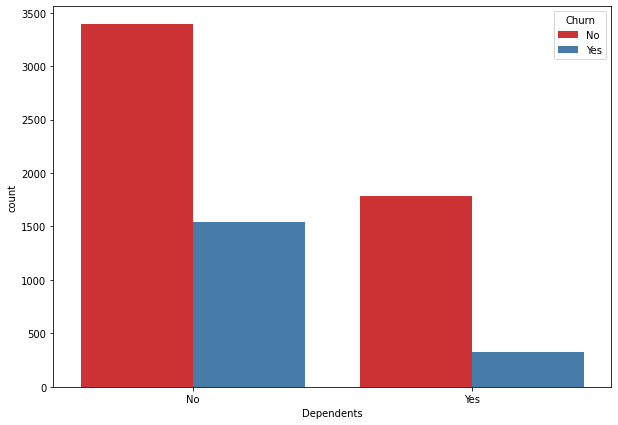

In [ ]:
#show hist Dependents
plt.figure(figsize=(10,7))
sns.countplot('Dependents', hue= 'Churn', data=df, palette='Set1')
plt.show()

- Dapat dilihat pada grafik di atas bahwa customer yang tidak mempunyai tanggungan lebih besar kemungkinannya melakukan churn

- 0 = tidak memilki tanggungan
- 1 = memiliki tanggungan

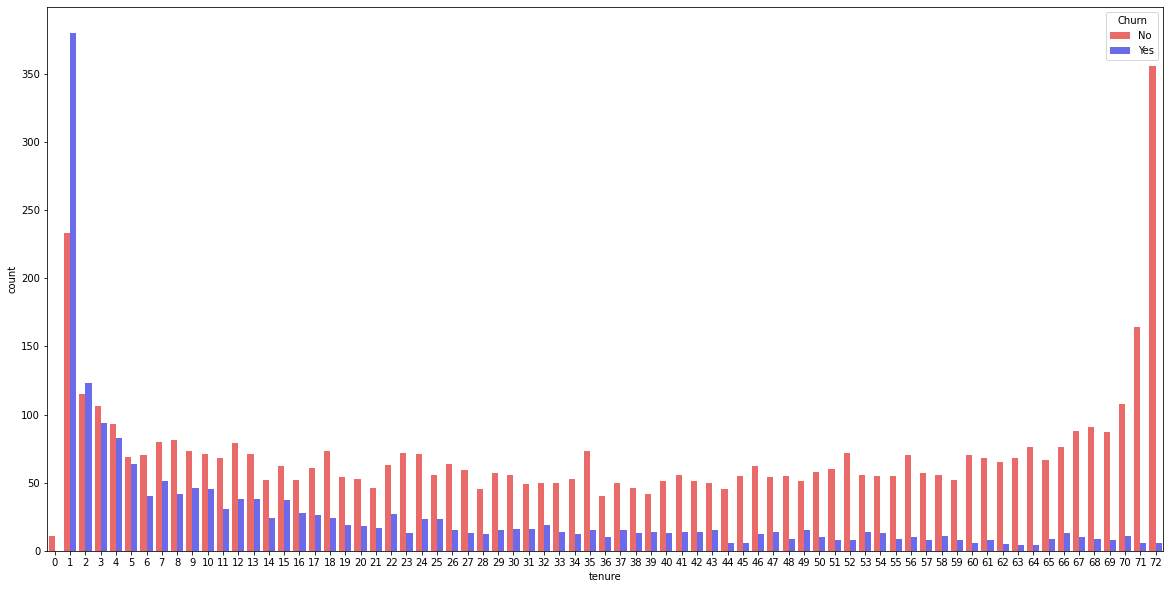

In [ ]:
#show hist tenure
plt.figure(figsize=(20,10))
sns.countplot('tenure', hue= 'Churn', data=df, palette='seismic_r')
plt.show()

- Tenure memiliki korelasi dengan target karna memperlihatkan lamanya jumlah berlangganan

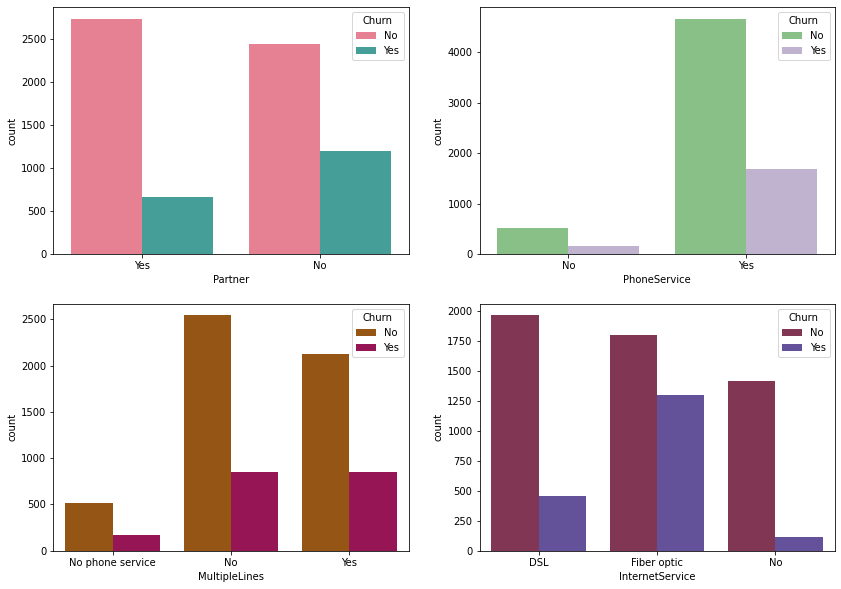

In [ ]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['Partner'] ,hue =df['Churn'] ,palette='husl')
plt.subplot(2,2,2)
sns.countplot(df['PhoneService'] ,hue =df['Churn'] ,palette='Accent')
plt.subplot(2,2,3)
sns.countplot(df['MultipleLines'] ,hue =df['Churn'] ,palette='brg_r')
plt.subplot(2,2,4)
sns.countplot(df['InternetService'] ,hue =df['Churn'] ,palette='twilight_r')

- partner memiliki korelasi karena orang tidak memilki pasangan lebih banyak melkukan churn

- phone service memilki korelasi yang kecil terhadapa target oleh karna itu tidak dipilih

- multipline tidak memilki korelasi karna tidak ada hubunganan antara customer churn dan memiliki saluran

- internet service memilkik korelasi karna custmer dengan fiber optic lebih sering melakukan churn

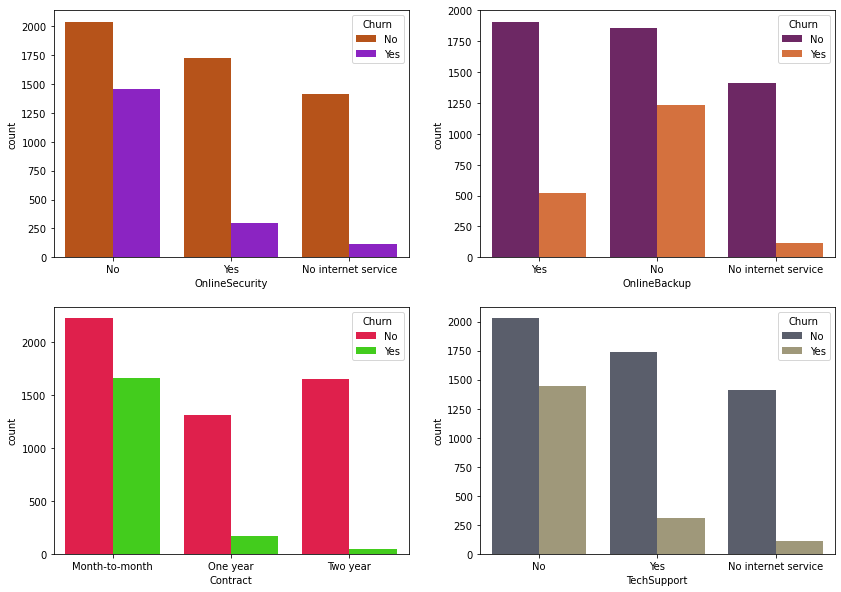

In [ ]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['OnlineSecurity'] ,hue =df['Churn'] ,palette='gnuplot_r')
plt.subplot(2,2,2)
sns.countplot(df['OnlineBackup'] ,hue =df['Churn'] ,palette='inferno')
plt.subplot(2,2,3)
sns.countplot(df['Contract'] ,hue =df['Churn'] ,palette='prism_r')
plt.subplot(2,2,4)
sns.countplot(df['TechSupport'] ,hue =df['Churn'] ,palette='cividis')

- online scurity memiliki korelasi karena orang tidak memilki online security lebih banyak melkukan churn dibandingkan yang memilki online security

- online backup memiliki korelasi karena orang tidak memilki online security lebih banyak melkukan churn dibandingkan yang memilki oniline backup

- contrac memilki korelasi karna memilki hubunganan dimana orang yang membayar perbulan leih sering melakukan churn

- tech support memiliki korelasi karena orang tidak memilki otech support lebih banyak melkukan churn dibandingkan yang memilki tech support

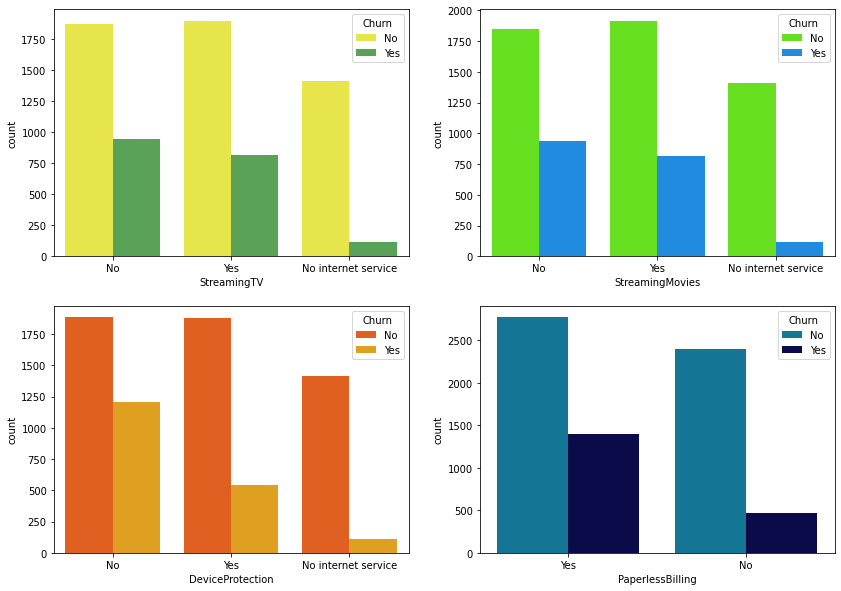

In [ ]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['StreamingTV'] ,hue =df['Churn'] ,palette='Set1_r')
plt.subplot(2,2,2)
sns.countplot(df['StreamingMovies'] ,hue =df['Churn'] ,palette='gist_rainbow')
plt.subplot(2,2,3)
sns.countplot(df['DeviceProtection'] ,hue =df['Churn'] ,palette='autumn')
plt.subplot(2,2,4)
sns.countplot(df['PaperlessBilling'] ,hue =df['Churn'] ,palette='ocean_r')

- Streaming TV memiliki korelasi karena orang tidak memilki Streaming TV lebih banyak melkukan churn dibandingkan yang memilki Streaming TV

- Streaming movies backup memiliki korelasi karena orang tidak memilki Streaming movies lebih banyak melkukan churn dibandingkan yang memilki Streaming movies

- Device protection memiliki korelasi karena orang tidak memilki Device protection lebih banyak melkukan churn dibandingkan yang memilki Device protection

- paperless memilki korelasi terhadap target dimana orang tidak meiliki tagihan dalam bentuk kertas lebih sering melkukan churn dimanding memilki churn

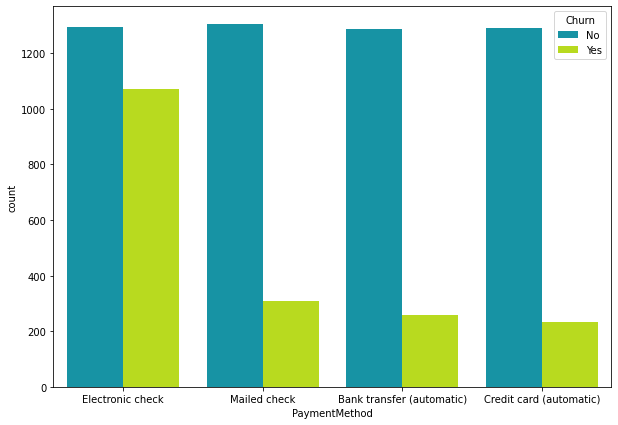

In [ ]:
#show hist PaymentMethod
plt.figure(figsize=(10,7))
sns.countplot('PaymentMethod', hue= 'Churn', data=df, palette='nipy_spectral')
plt.show()

- payment method memiliki korelasi dimana customer yang melakukan pembayaran melalui E payment paling banyak melakukan churn

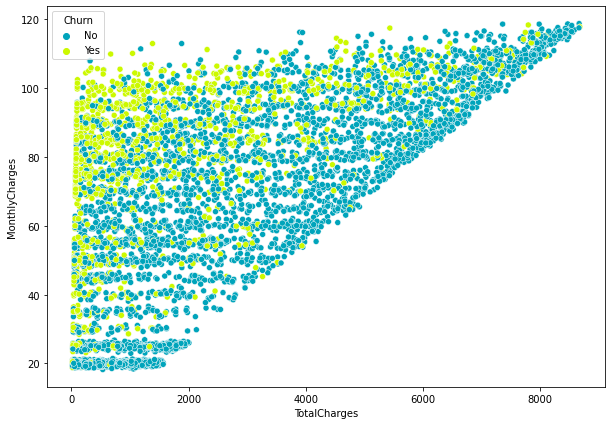

In [ ]:
#show hist PaymentMethod
plt.figure(figsize=(10,7))
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',hue= 'Churn', data=df, palette='nipy_spectral')
plt.show()

- dapat dilihat semakin besar monthly charges yang dibebankan semakin besar juga total charges yg dibebankan customer

# 5- Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get data for model inference

In [ ]:
#get data
data_inf = df.sample(21, random_state=21)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6091,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
745,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
5130,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
5616,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
6647,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
6924,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.50,Yes
1710,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
1658,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80,Yes
3614,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50,No


In [ ]:
# remove inference set from data set
data_train_test = df.drop(data_inf.index)

In [ ]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
1,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
2,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
3,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
4,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
5,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.50,Yes
7,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
8,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80,Yes
9,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50,No


##Splitting between `X` (Features) and `y` (Target)

In [ ]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('Churn', axis=1)
y = data_train_test['Churn']
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7018,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7019,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7020,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [ ]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=21)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (4493, 20)
Val Size :  (1124, 20)
Test Size :  (1405, 20)


##Handling outliers

kita akan melakukan handling outliers pada X_Train

In [ ]:
# make function to see histogram distribusion data dan box plot outliers
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=25)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()
    
    print('skewness:', X_train[variable].skew())
    if (X_train[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

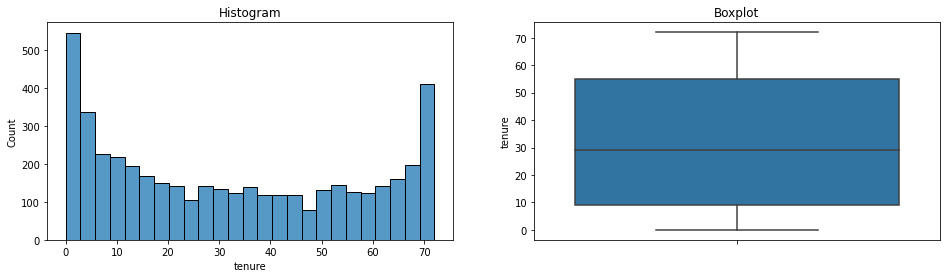

skewness: 0.23859058462698574
the distribution is normal


In [ ]:
# mengecek outliers pada column tenure
diagnostic_plots(X_train, 'tenure')

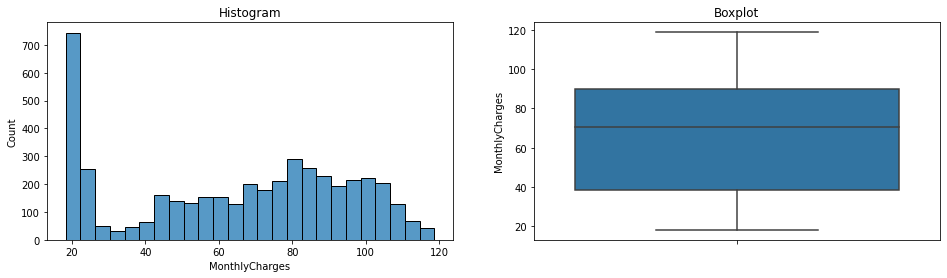

skewness: -0.23317931340690928
the distribution is normal


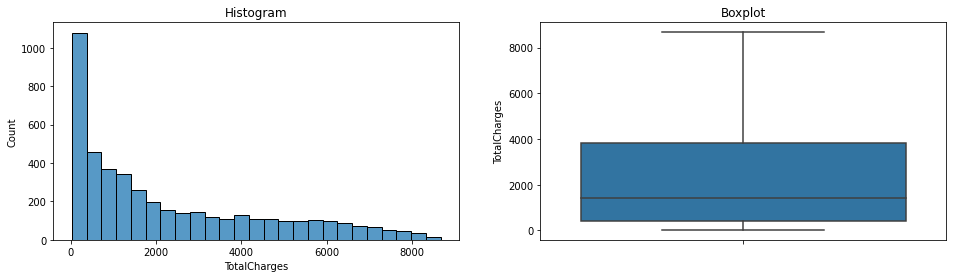

skewness: 0.9530258610055321
the distribution is skewed


In [ ]:
# mengecek outliers pada column lainnya
diagnostic_plots(X_train, 'MonthlyCharges')
diagnostic_plots(X_train, 'TotalCharges')

- Terdapat data yang memilki distribusi NOrmal dan Skew dan tidak terdapat outliers

- karena memeilki disribusi data yang berbeda maka saat scalling dilakukan minmax scaler dan standarscaler

## Handling missing Value

In [ ]:
#check missin value X_train
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        6
dtype: int64

- there is a missing value in the Total Charges, we will handle the missing value with a median

In [ ]:
median = X_train['TotalCharges'].median()
X_train['TotalCharges'].fillna(median, inplace=True)

In [ ]:
# Check Missing Values on X_val

X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

- there is a missing value in the Total Charges, we will handle the missing value with a median

In [ ]:
median = X_val['TotalCharges'].median()
X_val['TotalCharges'].fillna(median, inplace=True)

In [ ]:
# Check Missing Values on X_test

X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

- there is a missing value in the Total Charges, we will handle the missing value with a median

In [ ]:
median = X_test['TotalCharges'].median()
X_test['TotalCharges'].fillna(median, inplace=True)

In [ ]:
## check missing value in y_train
y_train.isnull().sum()

0

In [ ]:
## check missing value in y_val
y_val.isnull().sum()

0

In [ ]:
## check missing value in y_train
y_test.isnull().sum()

0

- we have managed to handle the missing value

## Feature Selection

In [ ]:
# Display X_train

X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
844,0422-OHQHQ,Female,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.55,295.95
3574,2292-XQWSV,Male,0,Yes,Yes,40,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Mailed check,60.30,2448.50
3389,3096-WPXBT,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),100.70,6018.65
5100,9258-CNWAC,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.65,8166.80
4205,9027-YFHQJ,Male,0,No,No,7,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.05,152.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9067-YGSCA,Female,0,No,No,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),26.05,1856.40
479,6227-HWPWX,Female,0,No,Yes,15,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.00,994.80
4053,4872-VXRIL,Male,0,No,No,56,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),64.65,3665.55
5437,1696-HXOWK,Female,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,One year,No,Mailed check,95.65,6856.95


In [ ]:
# Drop Columns

X_train.drop(['customerID', 'gender'], axis=1, inplace=True)
X_val.drop(['customerID', 'gender'], axis=1, inplace=True)
X_test.drop(['customerID', 'gender'], axis=1, inplace=True)
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
844,0,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.55,295.95
3574,0,Yes,Yes,40,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Mailed check,60.30,2448.50
3389,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),100.70,6018.65
5100,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.65,8166.80
4205,0,No,No,7,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.05,152.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,No,No,70,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),26.05,1856.40
479,0,No,Yes,15,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.00,994.80
4053,0,No,No,56,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),64.65,3665.55
5437,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,One year,No,Mailed check,95.65,6856.95


- kita melkukan drop dicolumn costumer id dan gender karna tidak meiliki korelasi terhadap target

## Split between Numerical Columns and Categorical Columns

In [ ]:
# Get Numerical Columns and Categorical Columns

num_columns = ['MonthlyCharges', 'TotalCharges']
cat_columns = ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen']

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure', 'SeniorCitizen']


## Feature Scalling

Scaling akan dilakukan dengan menggunakan pipeline bersama encoding, menggunakan minmaxscaler dan standar scaler

## Feature Encoding

encoding akan dilakukan di pipeline dan menggunakn ordinal encoder karna bentuk data masih berbrntuk rank dan melakukan encoding Y target karna berbrntuk categorical

###  Encoding Y target

In [ ]:
#Encoding target
labelencoder = LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [ ]:
#classes dari label encoder
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
#transform y target
y_train_encoded = labelencoder.transform(y_train)
y_test_encoded = labelencoder.transform(y_test)
y_val_encoded = labelencoder.transform(y_val)

In [ ]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_test_enc = pd.DataFrame(y_test_encoded, columns=['Churn'])
y_val_enc = pd.DataFrame(y_val_encoded, columns=['Churn'])

## Pipeline

In [ ]:
#divide num by skew and normal, cat by ordinal and none
num_skew = ['TotalCharges']
num_norm = ['MonthlyCharges']
cat_nom = ['Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']
cat_none = ['tenure', 'SeniorCitizen']

In [ ]:
#column transformer for each of the column category
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skew),
    ('numnom', StandardScaler(),num_norm),
    ('catord', OrdinalEncoder(),cat_nom),
    ('catnone', 'passthrough',cat_none)
])

In [ ]:
# Fit and Transform
X_train = preprocess.fit_transform(X_train)
X_val = preprocess.transform(X_val)
X_test = preprocess.transform(X_test)
X_train.shape

(4493, 16)

In [ ]:
import pickle
pickle.dump(preprocess, open('preprocess_pipe.pkl', 'wb'))

# 6 - Sequential API


## 6.1 - Model Definition

In [ ]:
# Create Sequential API


model_sequential = Sequential()
model_sequential.add(Dense(8, activation='relu', input_shape=(16,))) # Hidden Layer 1
model_sequential.add(Dense(4, activation='sigmoid'))  
model_sequential.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_sequential.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 8)                 136       
                                                                 
 dense_99 (Dense)            (None, 4)                 36        
                                                                 
 dense_100 (Dense)           (None, 1)                 5         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


disini menggunakan `8 neuron dan 16 feature`, dengan `output layer 1 neuron`, dengan ditambahkan aktivasi relu dimana untuk menyalakan neuron ,untuk aktifasi peneliti memilih `sigmoid(dikarenakan target hanya 2 class, iya atau tidak/1 atau 0)`dan disini  untuk menerapkan `baseline model memakai sigmoid`. Untuk loss  memakai `binary_crossentropy`, `Cross-entropy adalah fungsi loss default yang digunakan untuk masalah klasifikasi biner`, dan Ini dimaksudkan untuk digunakan dengan klasifikasi biner di mana nilai target berada di set 0 dan 1, untuk baseline peneliti mencoba memakai optimizer `Adam`, dan untuk metrics memakai `accuracy`, dikarenakan ` membuat model untuk case classification`.

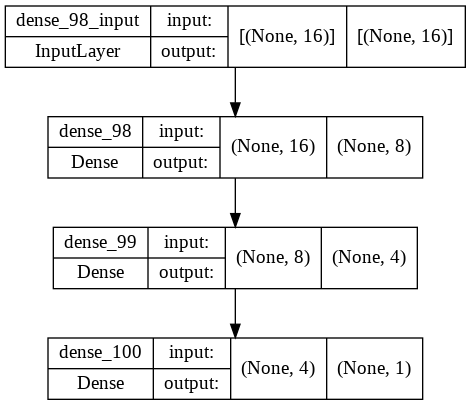

In [ ]:
# Plot Layers



tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 6.2 - Model Training

In [ ]:
# Train Program

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_enc))
train_dataset = train_dataset.shuffle(buffer_size=100).batch(64)

## Now we get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_enc))
test_dataset = test_dataset.batch(64)

## Now we get a val dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_enc))
val_dataset = val_dataset.batch(64)


In [ ]:
## Train the Model

%%time
history_seq = model_sequential.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
71/71 [==============================] - 1s 4ms/step - loss: 0.8070 - accuracy: 0.2682 - val_loss: 0.7404 - val_accuracy: 0.2411
Epoch 2/20
71/71 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5627 - val_loss: 0.6498 - val_accuracy: 0.7562
Epoch 3/20
71/71 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7550 - val_loss: 0.6033 - val_accuracy: 0.7705
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7630 - val_loss: 0.5751 - val_accuracy: 0.7758
Epoch 5/20
71/71 [==============================] - 0s 3ms/step - loss: 0.5707 - accuracy: 0.7670 - val_loss: 0.5513 - val_accuracy: 0.7936
Epoch 6/20
71/71 [==============================] - 0s 4ms/step - loss: 0.5494 - accuracy: 0.7730 - val_loss: 0.5307 - val_accuracy: 0.7998
Epoch 7/20
71/71 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.7834 - val_loss: 0.5139 - val_accuracy: 0.7989
Epoch 8/20
71/71 [==

- disini saya menggunakan epoch 10 agar saat running data akan mengalami 10 perulangan

## 6.3 - Model Evaluation

In [ ]:
# Create Dataframe

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.807022,0.268195,0.740386,0.241103
1,0.687341,0.562653,0.649795,0.756228
2,0.626394,0.754952,0.603295,0.770463
3,0.594743,0.762965,0.575137,0.775801
4,0.570679,0.766971,0.551255,0.793594
5,0.549439,0.772980,0.530680,0.799822
6,0.530266,0.783441,0.513915,0.798932
7,0.512870,0.787225,0.500158,0.797153
8,0.497747,0.792121,0.486649,0.796263
9,0.475996,0.795905,0.457566,0.794484


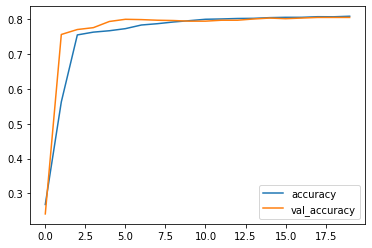

In [ ]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

dari grafik di atas setiap penambahan epoch accurasi meningkat,dan  accurasi val lebih tinggi dari accuracy dan itu sudah menunjukan model bagus

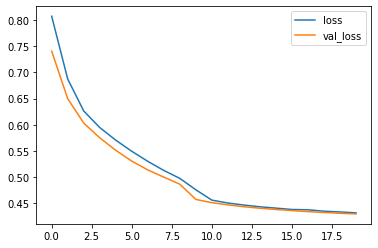

In [ ]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

Dari grafik diatas dapat dilihat bahwa loss dan vall semakin berkurang secara konvergen seiring bertambahnya epoch dan ini sudah menunjukan hasil yang baik

In [ ]:
# Model Evaluation using Classification Report
from sklearn.metrics import classification_report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_seq))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.66      0.50      0.57       379

    accuracy                           0.80      1405
   macro avg       0.75      0.70      0.72      1405
weighted avg       0.79      0.80      0.79      1405



-Untuk target 0

---
<b>Precision</b>:`83% dari 1026(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `17 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`17% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `91% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 9% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn

Untuk target 1


---

<b>Precision</b>:`66% dari 379(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `34 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`34% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `50% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `50% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn

untuk akurasi kita dapat di angka 80% dan rendah angka di target 1 di sebabkan oleh imbalance data oleh karnea itu harus ada improvement

## 6.4 MODEL IMPROVEMENT

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32,input_shape=(16,),kernel_initializer=tf.keras.initializers.GlorotNormal(seed=40)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 32)                544       
                                                                 
 dense_88 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_18 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 16)                0         
                                                                 
 dense_89 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_19 (Bat  (None, 8)                32        
 chNormalization)                                    

disini  melakukan Improvement, dengan menambahkan hiden layer, dan neuron dibagi 2 dari neuron hidden 1,dan menambahkan nitializers glorot dengan seed 40, diharapkan menambah performa

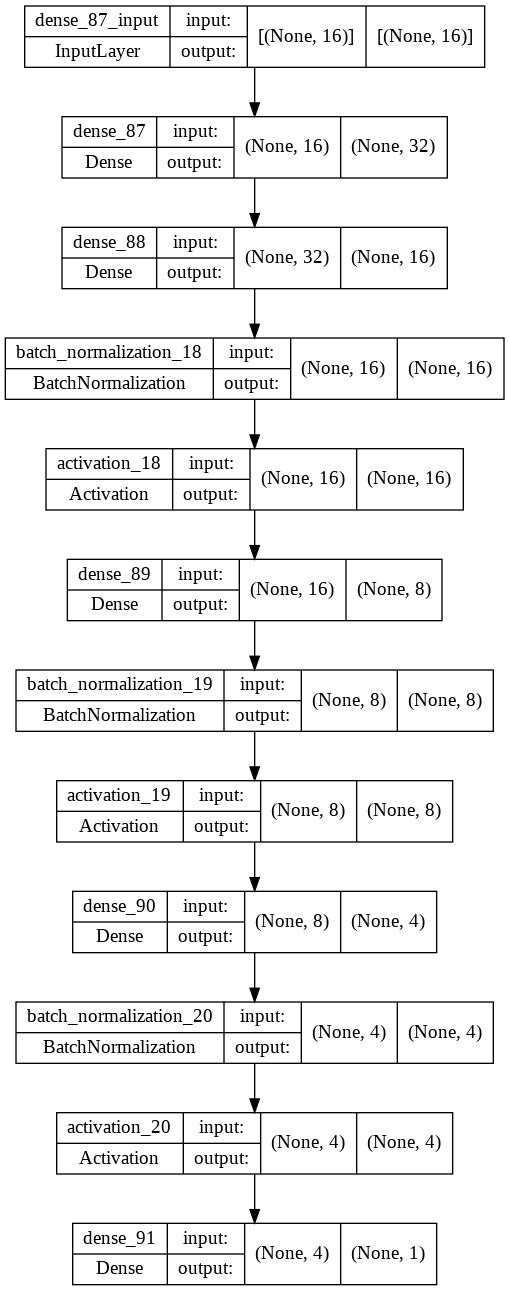

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
%%time
history_imp = model.fit(train_dataset, epochs=20, validation_data=val_dataset, verbose=1)

Epoch 1/20
71/71 [==============================] - 3s 6ms/step - loss: 0.6077 - accuracy: 0.7002 - val_loss: 0.9099 - val_accuracy: 0.4137
Epoch 2/20
71/71 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.7679 - val_loss: 0.5548 - val_accuracy: 0.7749
Epoch 3/20
71/71 [==============================] - 0s 4ms/step - loss: 0.4754 - accuracy: 0.7848 - val_loss: 0.4824 - val_accuracy: 0.7927
Epoch 4/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.7897 - val_loss: 0.4468 - val_accuracy: 0.8025
Epoch 5/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7932 - val_loss: 0.4312 - val_accuracy: 0.8025
Epoch 6/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.7948 - val_loss: 0.4300 - val_accuracy: 0.8025
Epoch 7/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.7979 - val_loss: 0.4310 - val_accuracy: 0.8016
Epoch 8/20
71/71 [==

In [ ]:
# Create Dataframe

history_imp_df = pd.DataFrame(history_imp.history)
history_imp_df

,loss,accuracy,val_loss,val_accuracy
0,0.607693,0.700200,0.909881,0.413701
1,0.518810,0.767861,0.554798,0.774911
2,0.475412,0.784776,0.482369,0.792705
3,0.451679,0.789673,0.446784,0.802491
4,0.438219,0.793234,0.431219,0.802491
5,0.428600,0.794792,0.430030,0.802491
6,0.424490,0.797908,0.430952,0.801601
7,0.422643,0.796572,0.419316,0.806050
8,0.419405,0.795237,0.422477,0.808719
9,0.419224,0.796795,0.419660,0.809609


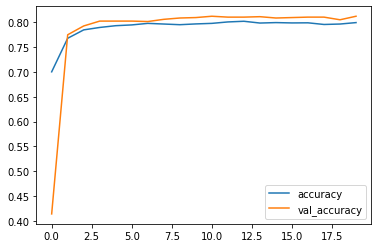

In [ ]:
# Plot between Accuracy and val_accuracy

history_imp_df[['accuracy', 'val_accuracy']].plot()

dari grafik di atas setiap penambahan epoch accurasi meningkat,dan  accurasi val lebih tinggi dari accuracy dan itu sudah menunjukan model bagus

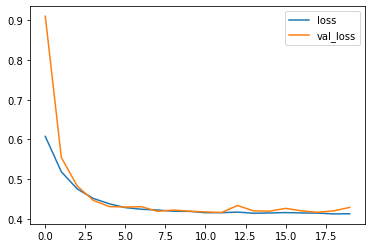

In [ ]:
# Plot between loss and val_loss

history_imp_df[['loss', 'val_loss']].plot()

Dari grafik diatas dapat dilihat bahwa loss dan vall semakin berkurang secara konvergen seiring bertambahnya epoch dan ini sudah menunjukan hasil yang baik

In [ ]:
y_pred_imp = model.predict(X_test)
y_pred_imp = np.where(y_pred_imp >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_imp))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1026
           1       0.65      0.52      0.58       379

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.72      1405
weighted avg       0.79      0.80      0.79      1405



-Untuk target 0

---
<b>Precision</b>:`84% dari 1026(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `17 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`16% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `90% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 10% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn

Untuk target 1


---

<b>Precision</b>:`66% dari 379(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `34 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`34% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `50% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `50% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn

untuk akurasi kita dapat di angka 80% dan rendah angka di target 1 di sebabkan oleh imbalance data oleh karnea itu harus ada improvement

# 7 - Functional API

## 7.1 - Model Definition

In [ ]:
# Create Functional Model



input_layer = Input(shape=(16,))
hidden_layer = Dense(8, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_101 (Dense)           (None, 8)                 136       
                                                                 
 dense_102 (Dense)           (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


Untuk baseline functional peneliti mendefinisikan neuron 8,dengan optimizer adam dan metriks accuracy, dengan activation sigmoid dimana fungsi itu untuk clasifikasi dengan target 0 atau 1

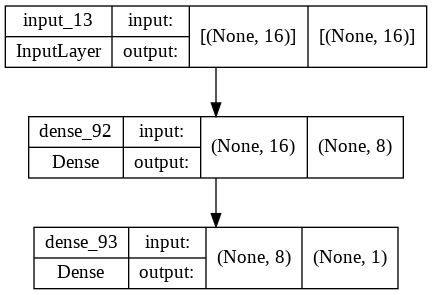

In [ ]:
# Plot Models

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 7.2 - Model Training

In [ ]:
## Train the Model

%%time
history_functional = model_functional.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
71/71 [==============================] - 1s 4ms/step - loss: 4.3791 - accuracy: 0.2600 - val_loss: 2.3923 - val_accuracy: 0.2811
Epoch 2/20
71/71 [==============================] - 0s 2ms/step - loss: 1.0837 - accuracy: 0.4908 - val_loss: 0.5105 - val_accuracy: 0.7776
Epoch 3/20
71/71 [==============================] - 0s 2ms/step - loss: 0.5188 - accuracy: 0.7529 - val_loss: 0.4773 - val_accuracy: 0.7802
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.7683 - val_loss: 0.4542 - val_accuracy: 0.7945
Epoch 5/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.7834 - val_loss: 0.4384 - val_accuracy: 0.7972
Epoch 6/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4440 - accuracy: 0.7881 - val_loss: 0.4294 - val_accuracy: 0.8034
Epoch 7/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.7901 - val_loss: 0.4232 - val_accuracy: 0.8025
Epoch 8/20
71/71 [==

- disini saya menggunakan epoch 20 agar saat running data akan mengalami 20 perulangan

## 7.3 - Model Evaluation

In [ ]:
# Create Dataframe

history_functional_df = pd.DataFrame(history_functional.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,4.379064,0.259960,2.392314,0.281139
1,1.083657,0.490763,0.510542,0.777580
2,0.518796,0.752949,0.477302,0.780249
3,0.485664,0.768306,0.454195,0.794484
4,0.457436,0.783441,0.438435,0.797153
5,0.444039,0.788115,0.429368,0.803381
6,0.435735,0.790118,0.423241,0.802491
7,0.430169,0.791453,0.418393,0.800712
8,0.425581,0.793011,0.415060,0.798932
9,0.423210,0.796350,0.413061,0.800712


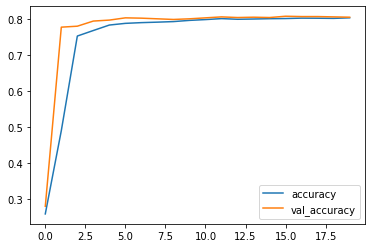

In [ ]:
# Plot between Accuracy and val_accuracy

history_functional_df[['accuracy', 'val_accuracy']].plot()

dari grafik di atas setiap penambahan epoch accurasi meningkat,dan  accurasi val lebih tinggi dari accuracy dan itu sudah menunjukan model bagus

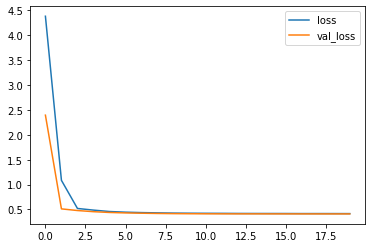

In [ ]:
# Plot between loss and val_loss

history_functional_df[['loss', 'val_loss']].plot()

Dari grafik diatas dapat dilihat bahwa loss dan vall semakin berkurang secara konvergen seiring bertambahnya epoch dan ini sudah menunjukan hasil yang baik

In [ ]:
# Model Evaluation using Classification Report
from sklearn.metrics import classification_report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1026
           1       0.66      0.51      0.58       379

    accuracy                           0.80      1405
   macro avg       0.75      0.71      0.72      1405
weighted avg       0.79      0.80      0.79      1405



-Untuk target 0

---
<b>Precision</b>:`83% dari 1026(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `17 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`17% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `90% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 10% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn

ntuk target 1


---

<b>Precision</b>:`66% dari 379(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `34 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`34% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `51% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `51% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn

## 7.4 Model improvement

In [ ]:
# Create Functional Model
input_layer = Input(shape=(16,))
initializer = Dense(64, kernel_initializer= tf.keras.initializers.GlorotNormal(seed=64))(input_layer)
hidden_layer = Dense(32, activation='relu')(initializer)
hidden_layer2 = Dense(16, activation='relu')(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

model2 = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# Model Compile
model2.compile(loss='binary_crossentropy', 
                         optimizer='Nadam',
                         metrics=['accuracy'])

model2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_94 (Dense)            (None, 64)                1088      
                                                                 
 dense_95 (Dense)            (None, 32)                2080      
                                                                 
 dense_96 (Dense)            (None, 16)                528       
                                                                 
 dense_97 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________


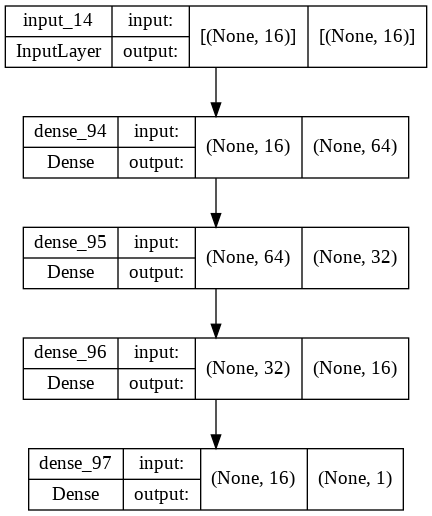

In [ ]:
# Plot Models

tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
## Train the Model

%%time
history_functional2 = model2.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
71/71 [==============================] - 1s 4ms/step - loss: 0.5121 - accuracy: 0.7554 - val_loss: 0.4867 - val_accuracy: 0.8078
Epoch 2/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7921 - val_loss: 0.4384 - val_accuracy: 0.8078
Epoch 3/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.7946 - val_loss: 0.4687 - val_accuracy: 0.8114
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7995 - val_loss: 0.4481 - val_accuracy: 0.8069
Epoch 5/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7948 - val_loss: 0.4119 - val_accuracy: 0.8096
Epoch 6/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8006 - val_loss: 0.4307 - val_accuracy: 0.7972
Epoch 7/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.7968 - val_loss: 0.4266 - val_accuracy: 0.8069
Epoch 8/20
71/71 [==

In [ ]:
# Create Dataframe

history_imp_df2 = pd.DataFrame(history_functional2.history)
history_imp_df2

,loss,accuracy,val_loss,val_accuracy
0,0.512074,0.755397,0.486723,0.807829
1,0.441273,0.792121,0.438363,0.807829
2,0.431441,0.794569,0.468681,0.811388
3,0.421895,0.799466,0.448110,0.806939
4,0.421992,0.794792,0.411930,0.809609
5,0.418010,0.800579,0.430674,0.797153
6,0.416960,0.796795,0.426637,0.806939
7,0.415195,0.799243,0.431525,0.806939
8,0.414220,0.801469,0.413829,0.808719
9,0.410410,0.803917,0.424770,0.800712


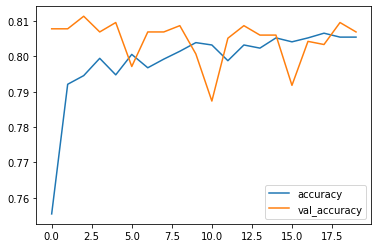

In [ ]:
# Plot between Accuracy and val_accuracy

history_imp_df2[['accuracy', 'val_accuracy']].plot()

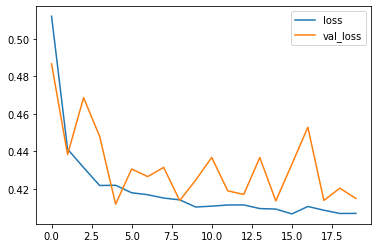

In [ ]:
# Plot between loss and val_loss

history_imp_df2[['loss', 'val_loss']].plot()

In [ ]:
y_pred_func2 = model2.predict(X_test)
y_pred_func2 = np.where(y_pred_func2 >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.66      0.48      0.56       379

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.78      0.79      0.78      1405



-Untuk target 0

---
<b>Precision</b>:`83% dari 1026(hasil support) ,memperediksi orang yang ada dikelas 0 dengan benar`. dan `17 % salah prediksi tentang 0` dan dimasukan ke kelas 1
,`17% kita prediksi 0 padahal bukan,dimana 0 adalah status tidak churn`<br>
<b>Recall</b>: `90% berhasil memprediksi orang yang ada di kelas 0 dengan benar`,` 10% salah prediksi, kita prediksi bukan sebagai 0, `padahal harusnya dia
masuk ke kelas 0, dimana 0 adalah pelanggan tidak churn

ntuk target 1


---

<b>Precision</b>:`66% dari 379(hasil support) ,memperediksi orang yang ada dikelas 1 dengan benar`. dan `34 % salah prediksi tentang 1 dan dimasukan ke kelas 0`. ,`34% kita prediksi 1 padahal bukan`,dimana 1 adalah status churn<br>
<b>Recall</b>: `48% berhasil memprediksi orang yang ada di kelas 1 dengan benar`, `52% salah prediksi, kita prediksi bukan sebagai 1`, padahal harusnya dia masuk ke kelas 1 dimana 1 adalah pelanggan  churn

Dari hasil model di atas di putuskan untuk menggunakan `Sequensial API improvement` walaupun memilki accuray yang sama dengan basline modelnya tetapi jumlah accuray recall bertambah


# 8- Model Inference

In [ ]:
#show data_inf
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
1,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
2,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
3,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
4,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
5,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.50,Yes
7,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
8,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.80,Yes
9,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.50,No


In [ ]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data_inf_scaled = preprocess.transform(data_inf)

In [ ]:
y_pred_inf = model.predict(data_inf_scaled)

In [ ]:
y_inf_pred_final = np.where(y_pred_inf > 0.5, 1 , 0)

In [ ]:
#kembalikan ke bentuk semula
y_inf_pred_final = labelencoder.inverse_transform(y_inf_pred_final)

In [ ]:
# Create Dataframe columns=['payment nextmont'])
y_inf_pred_final2= pd.DataFrame(y_inf_pred_final , columns=['func'])
# Concate between Inference-Set and Prediction
df_inf_func = pd.concat([data_inf, y_inf_pred_final2 ], axis=1)
df_inf_func.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,func
0,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes,Yes
1,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No,No
2,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes,No


In [ ]:
#compare prediction result and actual data
df_inf_func[['Churn','func']]

,Churn,func
0,Yes,Yes
1,No,No
2,Yes,No
3,No,No
4,No,No
5,Yes,Yes
6,Yes,No
7,No,Yes
8,Yes,No
9,No,No


- Dari 21  diata model meprediksi 13 bener dan hanya memilki prediksi 61%

# 9- Kesimpulan

from data loading and EDA:
- Data antara target 1 dan target 2 adalah imbalance (73,5% vs 26,5% antara Tidak dan Ya), oleh karena itu diperlukan penanganan handling imbalance data set

- columns yang tidak memilkiki corelasi dengan target yaitu Gender, PhoneService, and MultipleLines. The customerID is also automatically included to this.
- column yang memiliki korelasi dengan target TotalCharges, MonthlyCharges, PaymentMethod, PaperlessBilling, Contract, StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, tenure, Dependents, Partner, and  SeniorCitizen.

Feature selection:
- Category that selected are: 'Partner', 'Dependents', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod','tenure', 'SeniorCitizen','MonthlyCharges','TotalCharges'. Total of 16 categories

Missing value dan Handling outlier 
- missing value di handling menggunakan median dan tidak terdapat oulier pada data

Feature Scalling and encoding
- scalling dilakukan dengan minmaxscaler dan standar scaler dan encoding menggunkan ordinal encoder 
- lakukan encode target diakrenakn target berbentuk categorical

-model evalution
- pada model squential API tidak terjadi perubahan akurasi basline model dengan imprvoment tetapi accuracy recall naik
- pada model functional API terjadi perunahan akurasi baseline model dan improvemet 

untuk pemodelan skor terbaik yang peneliti dapat 80% dikarenakan data target imbalance, walaupun hasil datannya bagus dan lebih banyak yang tidak churn dari pada chur, untuk kenaikan accuracy mungkin peneliti menyarankan agar dapat feature lebih baik dan waktu lebih banyak untuk meneliti.

# 10 - saving model

In [ ]:
#freeze model
#freeze model
model.trainable = False

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 32)                544       
                                                                 
 dense_88 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_18 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 16)                0         
                                                                 
 dense_89 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_19 (Bat  (None, 8)                32        
 chNormalization)                                    

In [ ]:
model.save("churn_model")

In [ ]:
! zip -r model.zip churn_model

  adding: churn_model/ (stored 0%)
  adding: churn_model/keras_metadata.pb (deflated 92%)
  adding: churn_model/variables/ (stored 0%)
  adding: churn_model/variables/variables.index (deflated 71%)
  adding: churn_model/variables/variables.data-00000-of-00001 (deflated 42%)
  adding: churn_model/saved_model.pb (deflated 90%)
  adding: churn_model/assets/ (stored 0%)


## INFERENCE

In [ ]:
inf = pd.DataFrame(df.iloc[0,:]).T
inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
# load pipeline
pipe1 = pickle.load(open("preprocess_pipe.pkl", "rb"))

In [ ]:
inf = pipe1.transform(data_inf)
inf

array([[ 1.58950270e-02,  7.28529595e-01,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  2.00000000e+00,
         1.00000000e+00],
       [ 9.08685930e-01,  1.52713784e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  7.20000000e+01,
         1.00000000e+00],
       [ 2.39956550e-02, -1.15211780e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  8.00000000e+00,
         0.00000000e+00],
       [ 2.37732055e-01, -3.50175074e

In [ ]:
inf

In [ ]:
data_new = inf.tolist()
data_new

[[0.015895026953944288,
  0.7285295950876809,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  1.0,
  3.0,
  2.0,
  1.0],
 [0.908685930214418,
  1.5271378435105702,
  1.0,
  0.0,
  1.0,
  0.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  1.0,
  1.0,
  72.0,
  1.0],
 [0.023995655012624725,
  -1.152117804121127,
  0.0,
  0.0,
  0.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  2.0,
  8.0,
  0.0],
 [0.23773205525991922,
  -0.3501750744939669,
  1.0,
  1.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.0,
  38.0,
  0.0],
 [0.6419892184222842,
  0.4184228430904839,
  1.0,
  1.0,
  0.0,
  2.0,
  0.0,
  2.0,
  0.0,
  2.0,
  2.0,
  2.0,
  0.0,
  1.0,
  71.0,
  0.0],
 [0.005841465739890103,
  0.144995384340267,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  2.0,
  1.0,
  0.0],
 [0.3615468617288658,
  -0.5719180745779842,
  1.0,
  0.0,
  0.0,
  2.0,
  0.0,
  2.0,
  2.0,
  0.0,
  2.0,
  2.0,
  0.0,
  2.0,
  64